## *Step-1:* Business Problem Understanding
- Predict Insurance Premiums

## *Step-2:* Data understanding

**Import Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

**Load the data**

In [165]:
data = pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)
data.head(1)

id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   

  Education Level     Occupation  Health Score Location Policy Type  \
0      Bachelor's  Self-Employed     22.598761    Urban     Premium   

   Previous Claims  Vehicle Age  Credit Score  Insurance Duration  \
0              2.0         17.0         372.0                 5.0   

            Policy Start Date Customer Feedback Smoking Status  \
0  2023-12-23 15:21:39.134960              Poor             No   

  Exercise Frequency Property Type  Premium Amount  
0             Weekly         House          2869.0

**Understand each & every column**

1. **Age:** Age of the insured individual (Numerical).
2. **Gender:** Gender of the insured individual (Categorical: male,female).
3. **Annual Income:** Annual Income of the insured individual (Numerical, skewed).
4. **Marital Status:** Marital Status of the insured individual (Categorical: single, married, divorced).
5. **Number of Dependents:** Number of dependents (Numerical, with missing values).
6. **Education Level:** Highest education level attained (Categorical: High school, Bachelor's,Master's,PhD).
7. **Occupation:** Occupation of the insured individual (Categorical: Employed, Self-Employed,Unemployed).
8. **Health Score:** A score representing the health status (Numerical, skewed).
9. **Location:** Type of location (Categorical: Urban,Suburban,Rural).
10. **Policy Type:** Type of insurance policy (Categorical: Baisc,Comprehensive,Premium).
11. **Previous Claims:** Number of previous claims made(Numerical, with missing values).
12. **Vehicle Age:** Age of the vehicle insured (Numerical).
13. **Credit Score:** Credit score of the individual (Numerical,with missing values).
14. **Insurance Duration:** duration of the insuurance policy(Numerical, in years).
15. **Premium Amount:** Target Variable representing the insurance premium premium amount (Numerical, skewed).
16. **Policy Start Date:** Start date of the insurance policy (Text, improperly formatted).
17. **Customer Feedback:** Short feedback comments from customers (Text).
18. **Smoking Status:** Smoking status of the insured individual (Categorical:Yes, No).
19. **Exercise Frrequency:** Frequency of exercise (Categorical:Daily, Weekly, Monthly, Rarely).
20. **Property Type:** Type of property owned (Categorical: House,Appartment,Condo)

**Data Exploration**

In [76]:
data.shape

(1200000, 21)

In [77]:
data.columns

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

**Rename Columns**

In [166]:
data.rename(columns={'Annual Income':'Annual_Income','Marital Status':'Marital_Status',
                     'Number of Dependents':'Number_of_Dependents','Education Level':'Education_Level',
                     'Health Score':'Health_Score','Policy Type':'Policy_Type',
                     'Previous Claims':'Previous_Claims','Vehicle Age':'Vehicle_Age',
                     'Credit Score':'Credit_Score','Insurance Duration':'Insurance_Duration',
                     'Policy Start Date':'Policy_Start_Date','Customer Feedback':'Customer_Feedback',
                     'Smoking Status':'Smoking_Status','Exercise Frequency':'Exercise_Frequency',
                     'Property Type':'Property_Type','Premium Amount':'Premium_Amount'
},inplace=True)

In [117]:
data.columns

Index(['id', 'Age', 'Gender', 'Annual_Income', 'Marital_Status',
       'Number_of_Dependents', 'Education_Level', 'Occupation', 'Health_Score',
       'Location', 'Policy_Type', 'Previous_Claims', 'Vehicle_Age',
       'Credit_Score', 'Insurance_Duration', 'Policy_Start_Date',
       'Customer_Feedback', 'Smoking_Status', 'Exercise_Frequency',
       'Property_Type', 'Premium_Amount'],
      dtype='object')

**Feature Engineering**

**1. Age**

In [167]:
data['Age'].isnull().sum()

18705

In [168]:
# Replacing missing values with mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [169]:
# Binning age column into 6 categories
age_bins = [0, 18, 30, 40, 50, 60, 100]
age_labels = ['18 and below', '19-30', '31-40', '41-50', '51-60', '60+']
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=True)
data['Age_Group'] = data['Age_Group'].astype('object')

In [170]:
data['Age_Group'].value_counts()

Age_Group
19-30           294956
41-50           270506
31-40           254369
51-60           253341
60+             102340
18 and below     24488
Name: count, dtype: int64

**2. Annual_Income**

In [171]:
data['Annual_Income'].isnull().sum()

44949

In [172]:
# Replacing missing values with median
data['Annual_Income'].fillna(data['Annual_Income'].median(),inplace=True)

In [173]:
# Binning Annual_Income column into 7 categories
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 150000]
income_labels = ['0-20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '100k-120k', '120k-150k']
data['Income_Bins'] = pd.cut(data['Annual_Income'], bins=income_bins, labels=income_labels, right=True)
data['Income_Bins'] = data['Income_Bins'].astype('object')

In [174]:
data['Income_Bins'].value_counts()

Income_Bins
0-20k        527233
20k-40k      333876
40k-60k      146438
60k-80k       73851
80k-100k      52011
120k-150k     37100
100k-120k     29491
Name: count, dtype: int64

**3. Health_Score**

In [175]:
data['Health_Score'].isnull().sum()

74076

In [176]:
# Replacing missing values with mean
data['Health_Score'].fillna(data['Health_Score'].mean(),inplace=True)

In [177]:
# Binning Health_Score column into 3 categories
bins = [2, 20, 40, 60]
labels = ['Low', 'Medium', 'High']
data['Health_Score_Category'] = pd.cut(data['Health_Score'], bins=bins, labels=labels, right=True)
data['Health_Score_Category'] = data['Health_Score_Category'].astype('object')

In [178]:
data['Health_Score_Category'].value_counts()

Health_Score_Category
Medium    617054
Low       416136
High      166810
Name: count, dtype: int64

**4. Vehicle_Age**

In [179]:
data['Vehicle_Age'].isnull().sum()

6

In [180]:
# Replacing missing values with mode, since data is uniformly distriuted along 20 unique values
data['Vehicle_Age'].fillna(data['Vehicle_Age'].mode()[0],inplace=True)

In [181]:
# Binning Vehicle_Age column into 4 categories
data['Vehicle_Age_Group'] = pd.cut(data['Vehicle_Age'], bins=[0, 2, 5, 10, 20], labels=['New', 'Used', 'Old', 'Very Old'],include_lowest=True)
data['Vehicle_Age_Group'] = data['Vehicle_Age_Group'].astype('object')

In [182]:
data['Vehicle_Age_Group'].value_counts()

Vehicle_Age_Group
Very Old    547308
Old         297266
New         178721
Used        176705
Name: count, dtype: int64

**5. Credit_Score**

In [183]:
data['Credit_Score'].isnull().sum()

137882

In [184]:
# Replacing missing values with median 
data['Credit_Score'].fillna(data['Credit_Score'].median(),inplace=True)

In [185]:
# Binning Credit_Score column into 5 categories
data['Credit_Score_Category'] = pd.cut(data['Credit_Score'], bins=[300, 580, 670, 740, 800, 850], 
                                     labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'],include_lowest=True)
data['Credit_Score_Category'] = data['Credit_Score_Category'].astype('object')

In [186]:
data['Credit_Score_Category'].value_counts()

Credit_Score_Category
Poor         491667
Fair         328505
Good         153616
Very Good    135760
Excellent     90452
Name: count, dtype: int64

**6. Policy_Start_Date**

In [187]:
# Convert object datatype into datetime format
data['Policy_Start_Date'] = pd.to_datetime(data['Policy_Start_Date'],format='mixed')

In [188]:
data.columns

Index(['id', 'Age', 'Gender', 'Annual_Income', 'Marital_Status',
       'Number_of_Dependents', 'Education_Level', 'Occupation', 'Health_Score',
       'Location', 'Policy_Type', 'Previous_Claims', 'Vehicle_Age',
       'Credit_Score', 'Insurance_Duration', 'Policy_Start_Date',
       'Customer_Feedback', 'Smoking_Status', 'Exercise_Frequency',
       'Property_Type', 'Premium_Amount', 'Age_Group', 'Income_Bins',
       'Health_Score_Category', 'Vehicle_Age_Group', 'Credit_Score_Category'],
      dtype='object')

In [189]:
# Separating columns into different data types
continous = ['Age','Annual_Income','Health_Score','Vehicle_Age','Credit_Score',
             'Premium_Amount']
discrete_count = ['Number_of_Dependents','Previous_Claims','Insurance_Duration']
ordinal = ['Education_Level','Exercise_Frequency','Customer_Feedback',
           'Income_Bins','Age_Group','Health_Score_Category',
           'Vehicle_Age_Group','Credit_Score_Category']
nominal = ['Gender','Marital_Status','Occupation','Location',
           'Policy_Type','Smoking_Status','Property_Type']
other = ['id','Policy_Start_Date']

In [190]:
# No of unique values in each feature
col_name = []
unique_count = []
for col in discrete_count+ordinal+nominal+other:
    count = data[col].nunique()
    unique_count.append(count)
    col_name.append(col)

unique_df = pd.DataFrame({'Unique_count':unique_count},index=col_name)
print('No of Unique values In each Column:')
unique_df.T

No of Unique values In each Column:


Number_of_Dependents  Previous_Claims  Insurance_Duration  \
Unique_count                     5               10                   9   

              Education_Level  Exercise_Frequency  Customer_Feedback  \
Unique_count                4                   4                  3   

              Income_Bins  Age_Group  Health_Score_Category  \
Unique_count            7          6                      3   

              Vehicle_Age_Group  Credit_Score_Category  Gender  \
Unique_count                  4                      5       2   

              Marital_Status  Occupation  Location  Policy_Type  \
Unique_count               3           3         3            3   

              Smoking_Status  Property_Type       id  Policy_Start_Date  
Unique_count               2              3  1200000             167381

**Feature Selection (Wrapper Method)**

**1. Based on no of unique values**

In [191]:
# Drop columns based on no of unique values
drop_cols = ['id']
data.drop(columns=drop_cols,inplace=True)

**2. Based on missing values**

In [85]:
# Drop columns based on missing values
data.isnull().sum()
# Missing values should be handled properly
# mis_cols = ['Marital_Status','Number_of_Dependents','Occupation','Previous_Claims','Insurance_Duration','Customer_Feedback']

Age                           0
Gender                        0
Annual_Income                 0
Marital_Status            18529
Number_of_Dependents     109672
Education_Level               0
Occupation               358075
Health_Score                  0
Location                      0
Policy_Type                   0
Previous_Claims          364029
Vehicle_Age                   0
Credit_Score                  0
Insurance_Duration            1
Policy_Start_Date             0
Customer_Feedback         77824
Smoking_Status                0
Exercise_Frequency            0
Property_Type                 0
Premium_Amount                0
Age_Group                     0
Income_Bins                   0
Health_Score_Category         0
Vehicle_Age_Group             0
Credit_Score_Category         0
dtype: int64

**Categorical column exploration (No of Unique values and value counts)**

In [97]:
# unique values and their counts
for col in discrete_count+ordinal+nominal:
    print(col)
    print(data[col].unique())
    print('-'*50)

Number_of_Dependents
[ 1.  3.  2.  0.  4. nan]
--------------------------------------------------
Previous_Claims
[ 2.  1.  0. nan  3.  4.  5.  6.  7.  8.  9.]
--------------------------------------------------
Insurance_Duration
[ 5.  2.  3.  1.  4.  6.  8.  9.  7. nan]
--------------------------------------------------
Education_Level
["Bachelor's" "Master's" 'High School' 'PhD']
--------------------------------------------------
Exercise_Frequency
['Weekly' 'Monthly' 'Daily' 'Rarely']
--------------------------------------------------
Customer_Feedback
['Poor' 'Average' 'Good' nan]
--------------------------------------------------
Income_Bins
['0-20k' '20k-40k' '120k-150k' '40k-60k' '60k-80k' '80k-100k' '100k-120k']
--------------------------------------------------
Age_Group
['19-30' '31-40' '41-50' '51-60' '18 and below' '60+']
--------------------------------------------------
Health_Score_Category
['Medium' 'Low' 'High']
--------------------------------------------------
Vehicl

**Observations**
- Min no. of dependents is 0 and max is 4.
- Min no of previous claims is 0 and max is 9.
- Min year of insurance duration is 1 and max is 9.

In [100]:
# value counts
for col in discrete_count+ordinal+nominal:
    print(data[col].value_counts(normalize=True).to_frame().T)
    print('-'*50)

Number_of_Dependents       3.0       4.0       0.0       2.0       1.0
proportion            0.203127  0.202086  0.200054  0.197475  0.197258
--------------------------------------------------
Previous_Claims       0.0       1.0       2.0       3.0       4.0       5.0  \
proportion       0.365363  0.359834  0.200558  0.058628  0.012761  0.002414   

Previous_Claims       6.0       7.0      8.0       9.0  
proportion       0.000361  0.000069  0.00001  0.000001  
--------------------------------------------------
Insurance_Duration       9.0      1.0     8.0       7.0       5.0       4.0  \
proportion          0.114818  0.11256  0.1115  0.111327  0.110211  0.110152   

Insurance_Duration       6.0       3.0     2.0  
proportion          0.110118  0.110015  0.1093  
--------------------------------------------------
Education_Level  Master's       PhD  Bachelor's  High School
proportion       0.253182  0.252922    0.252695     0.241201
--------------------------------------------------
Ex

**Observations**
- No of dependents are equally distributed along all unique values.
- 90% of the people claim insurance rarely and 10% people claim insurance more than 3 times.
- insurance duration is same across all the unique values.
- Education level is same across all the unique values.
- Exercise frequency is same across all the unique values.
- Customer feedback is same across all the unique values.
- 90% of income ranges between 0-60k and remaining is 10%.
- 90% age group ranges from 19-60. 8% belong to above 60 and 2% belong to below 18.
- 70% vehicles are old and remaining 30% are ok condition.
- Most of the people have poor credit score (40%).
- Marital status distribution is same across all the unique values.
- Occupation distribution is same across all the unique values.
- Location distribution is same across all the unique values.
- Policy type distribution is same across all the unique values.
- smoking status distribution is same across all the unique values.
- Property type distribution is same across all the unique values.

**Numerical column exploration (Describe function)**

In [209]:
data[continous].describe().T

count          mean        std       min        25%  \
Age             1200000.0  2.118957e-15   1.000000 -1.722909  -0.829653   
Annual_Income   1200000.0  3.059479e-17   1.000000 -1.119781  -0.807350   
Health_Score    1200000.0 -3.536075e-16   1.000000 -1.996623  -0.766390   
Vehicle_Age     1200000.0  1.281345e-16   1.000000 -1.656787  -0.791165   
Credit_Score    1200000.0 -1.915209e-17   1.000000 -2.077637  -0.773634   
Premium_Amount  1200000.0  3.523285e+01  13.407678  5.778188  27.769769   

                         50%        75%        max  
Age             2.115655e-15   0.882420   1.701238  
Annual_Income  -2.556718e-01   0.468033   2.381109  
Health_Score    0.000000e+00   0.690223   2.822314  
Vehicle_Age     7.445630e-02   0.940078   1.632575  
Credit_Score    1.301986e-02   0.799674   1.813111  
Premium_Amount  3.488241e+01  44.033371  72.568837

**Observations**
- Min age is 18 and max is 64.
- min Annual income is 1, this may be wrong data, this data may be affect most to the output check it later.
- Min health score is 2 and max is 58.
- min vehicle age is 0 and max is 9
- min credit score is 300 and max is 849.
- min premium amount is 20 and max premium amount is 4999,

**Exploratory Data Analysis**

**Unique value distribution**

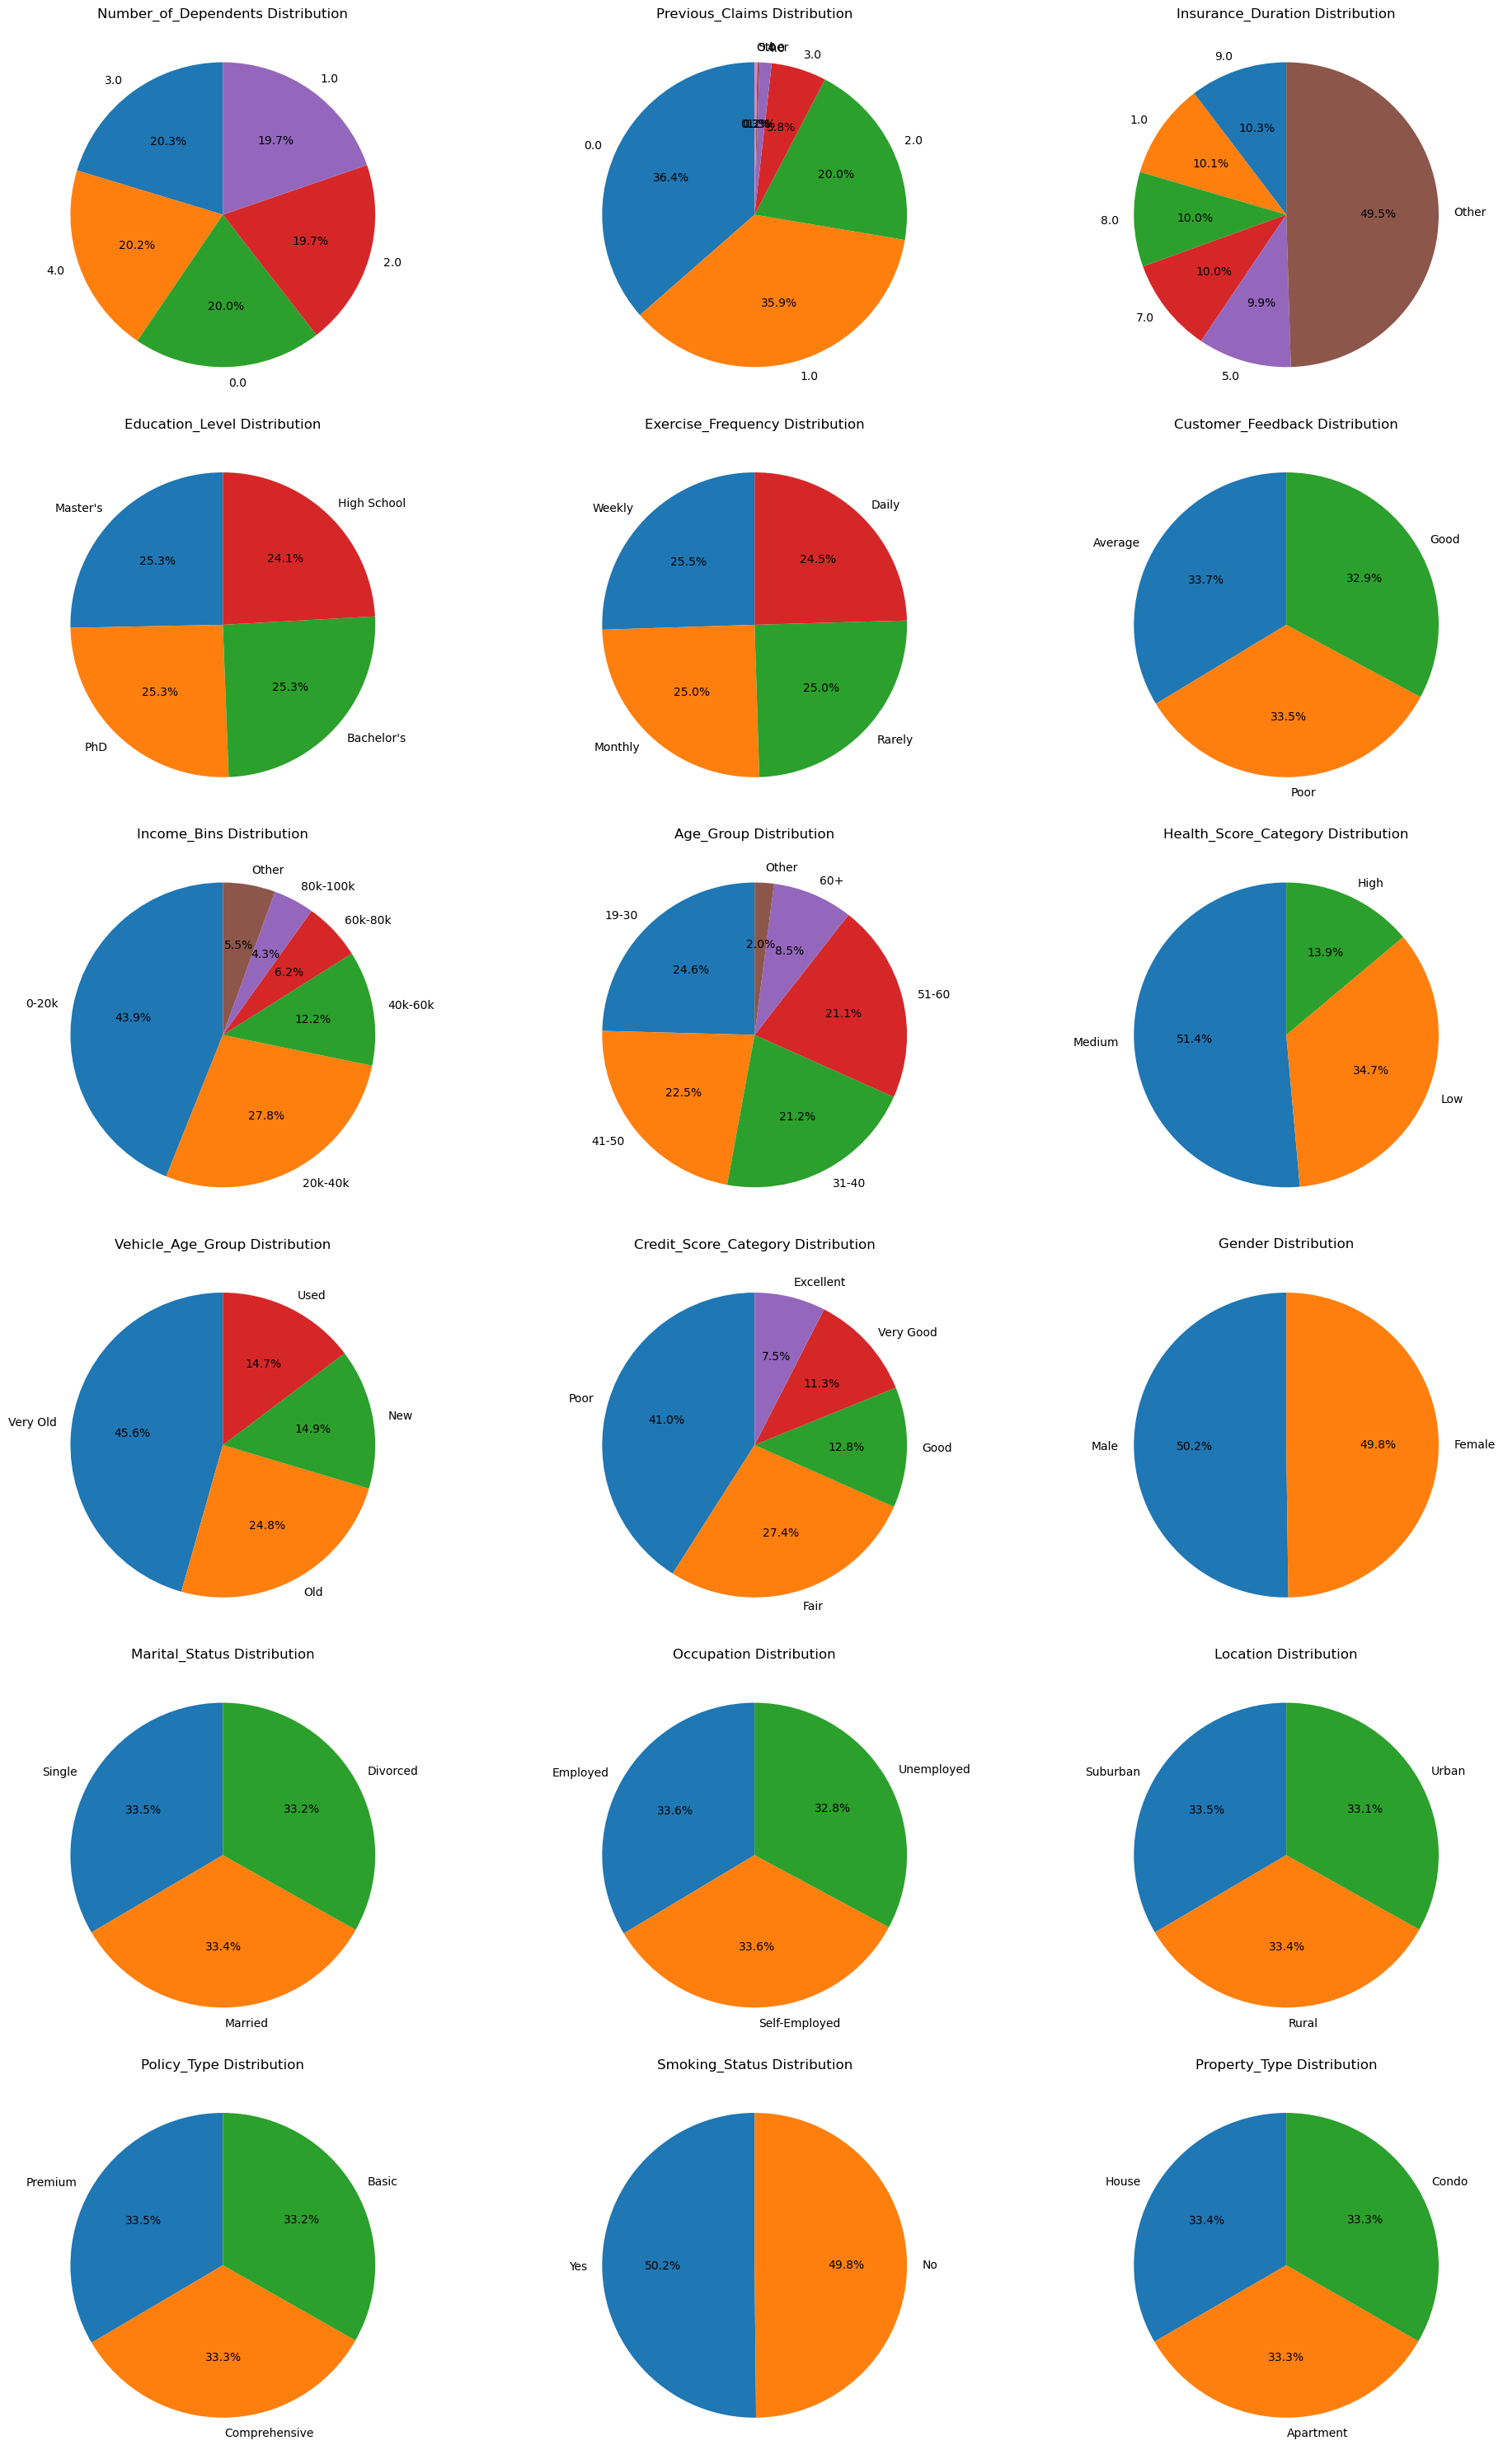

In [110]:
# Specify the maximum number of categories to show individually
max_categories = 5

# Filter categorical columns with 'object' datatype
cat_cols = discrete_count + ordinal + nominal

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Create a pie chart for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Count the number of occurrences for each category
        cat_counts = data[col].value_counts()

        # Group categories beyond the top max_categories as 'other'
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_count_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_count_other])  # Updated code

        # Create a pie chart
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

**Premium amount distribution(boxplot) along with unique values** 

In [192]:
from scipy.stats import boxcox
data['Premium_Amount'], param = boxcox(data['Premium_Amount'])

In [210]:
param

0.3992321289235637

In [193]:
data['Premium_Amount'].skew()

-0.058404620001580324

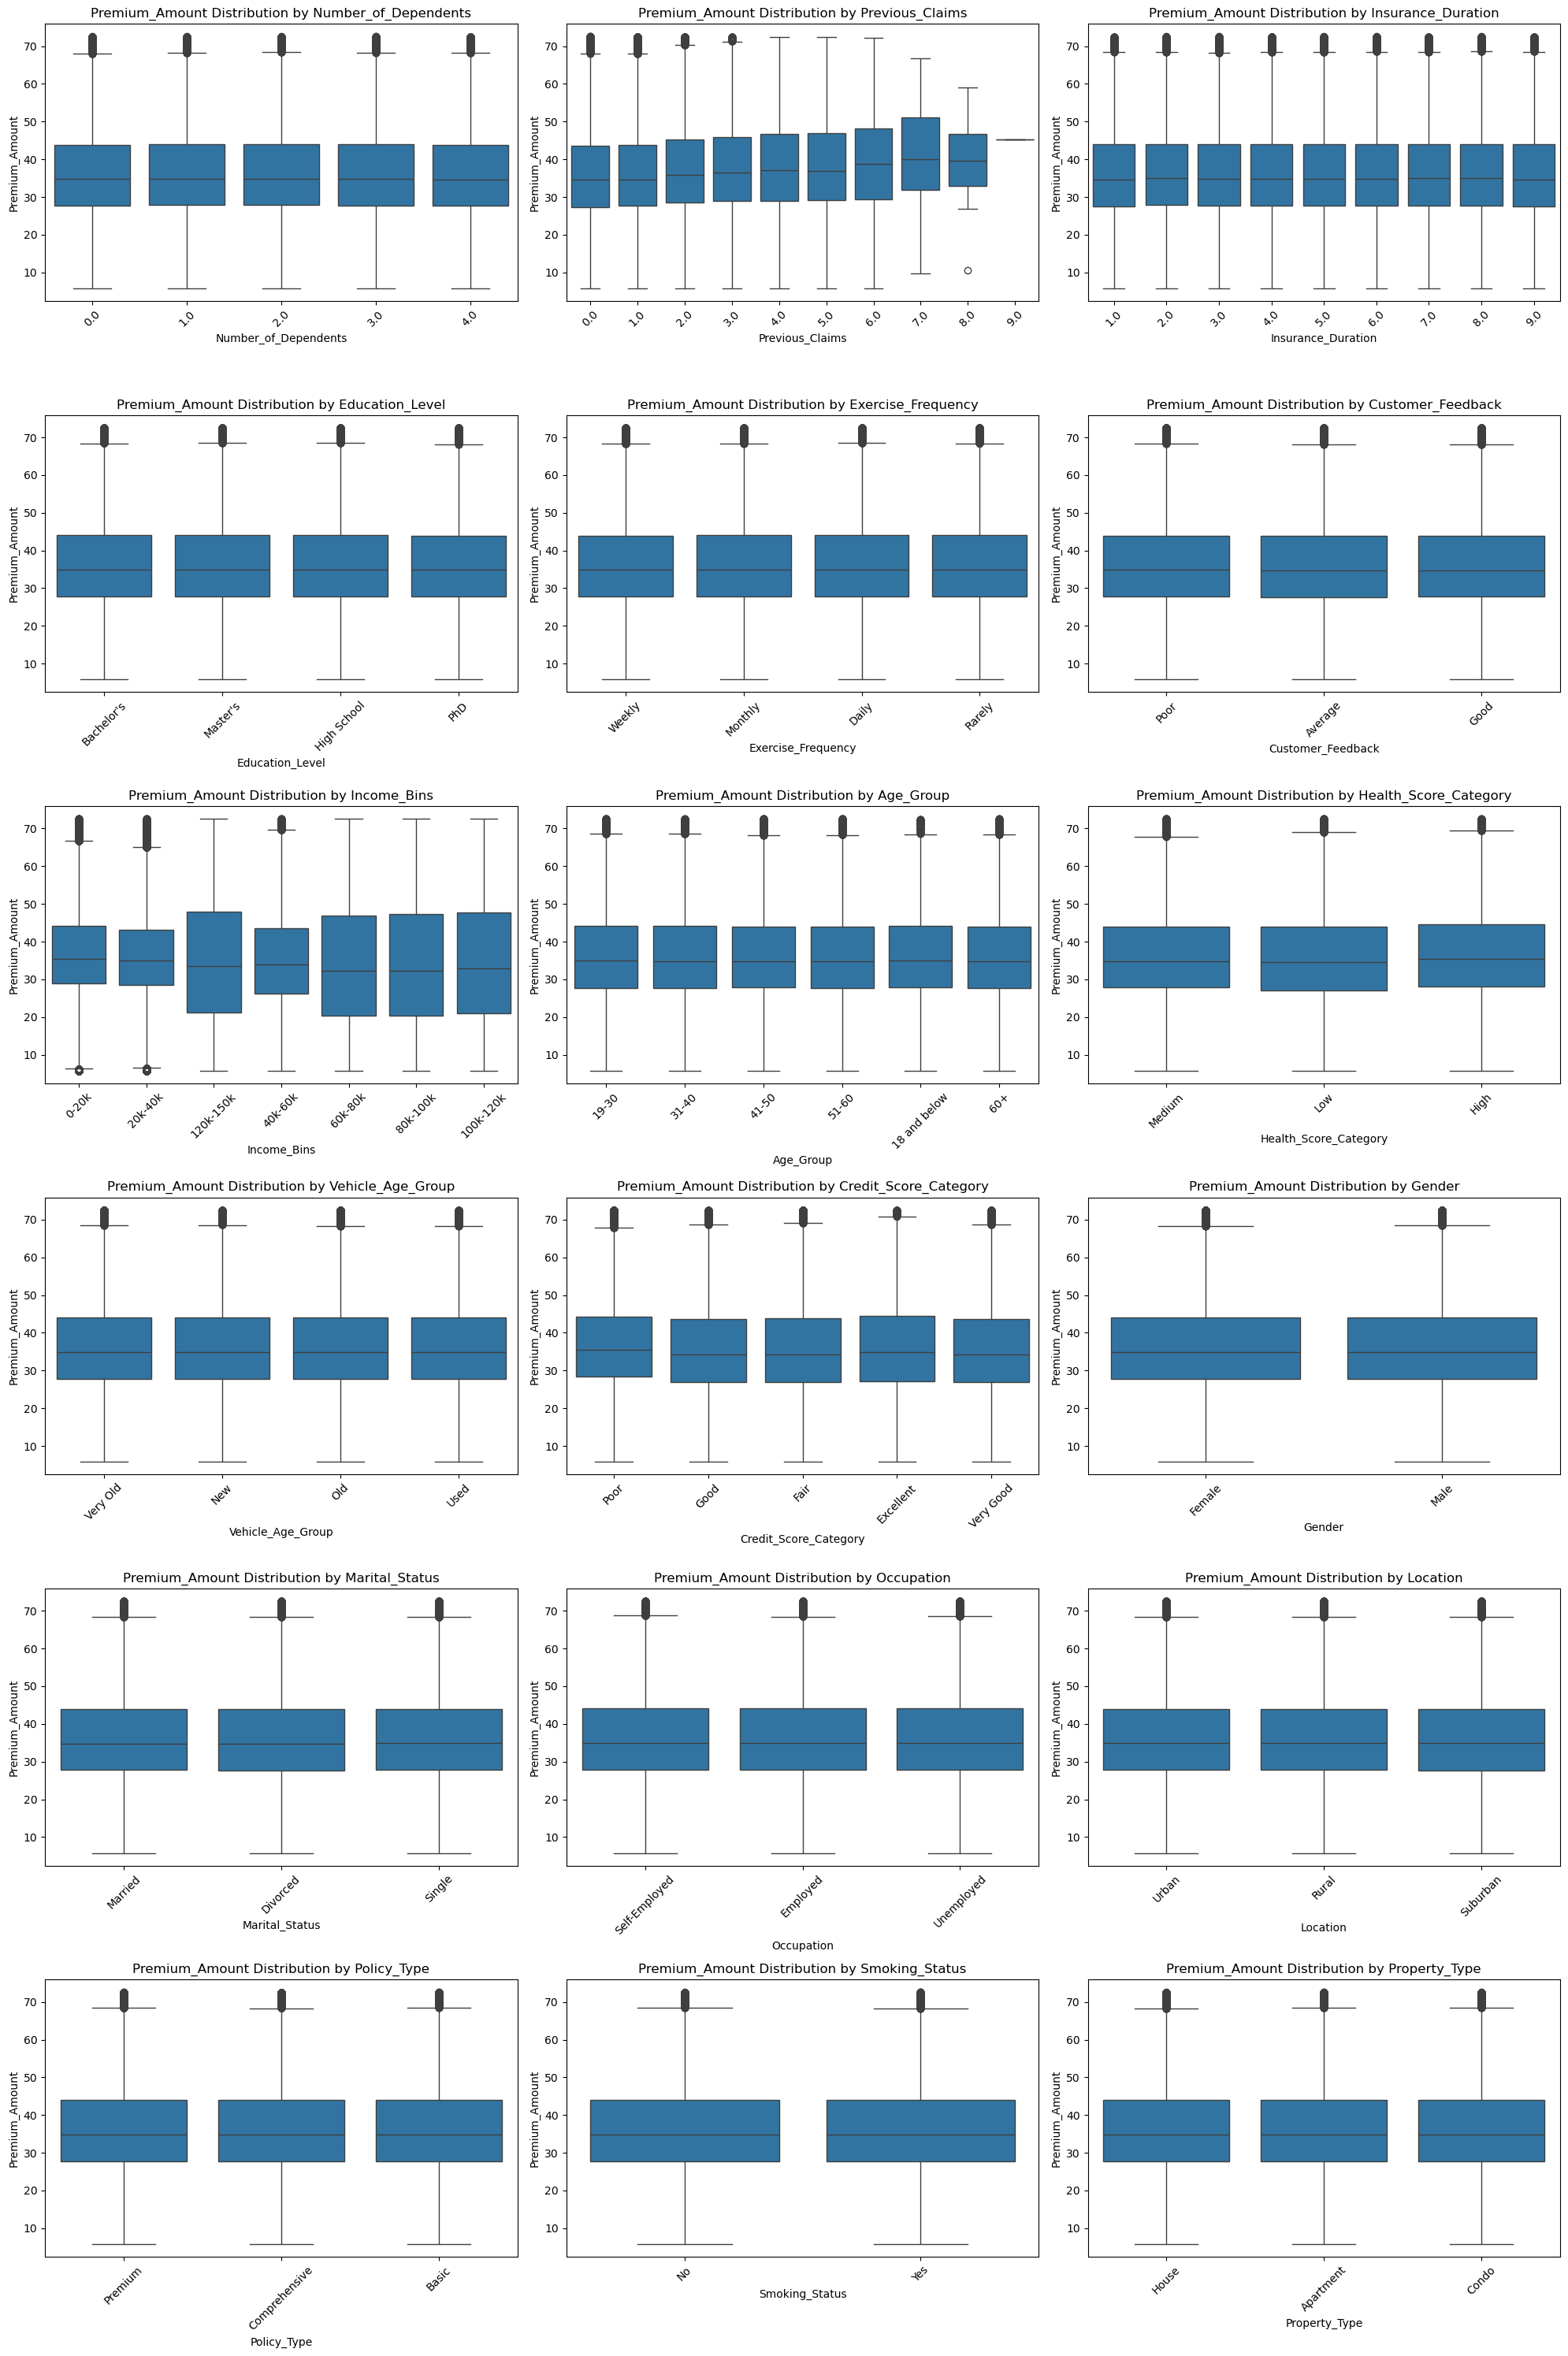

In [147]:
# Specify the target column to analyze
target_column = 'Premium_Amount'

# Filter the categorical columns
cat_cols = discrete_count+ordinal+nominal

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3  # 3 columns per row
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Create a boxplot for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        sns.boxplot(x=data[col], y=data[target_column], ax=axs[i])
        axs[i].set_title(f'{target_column} Distribution by {col}')
        axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any remaining blank subplots
for i in range(len(cat_cols), len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

**Premium amount distribution(histogram) along with unique values** 

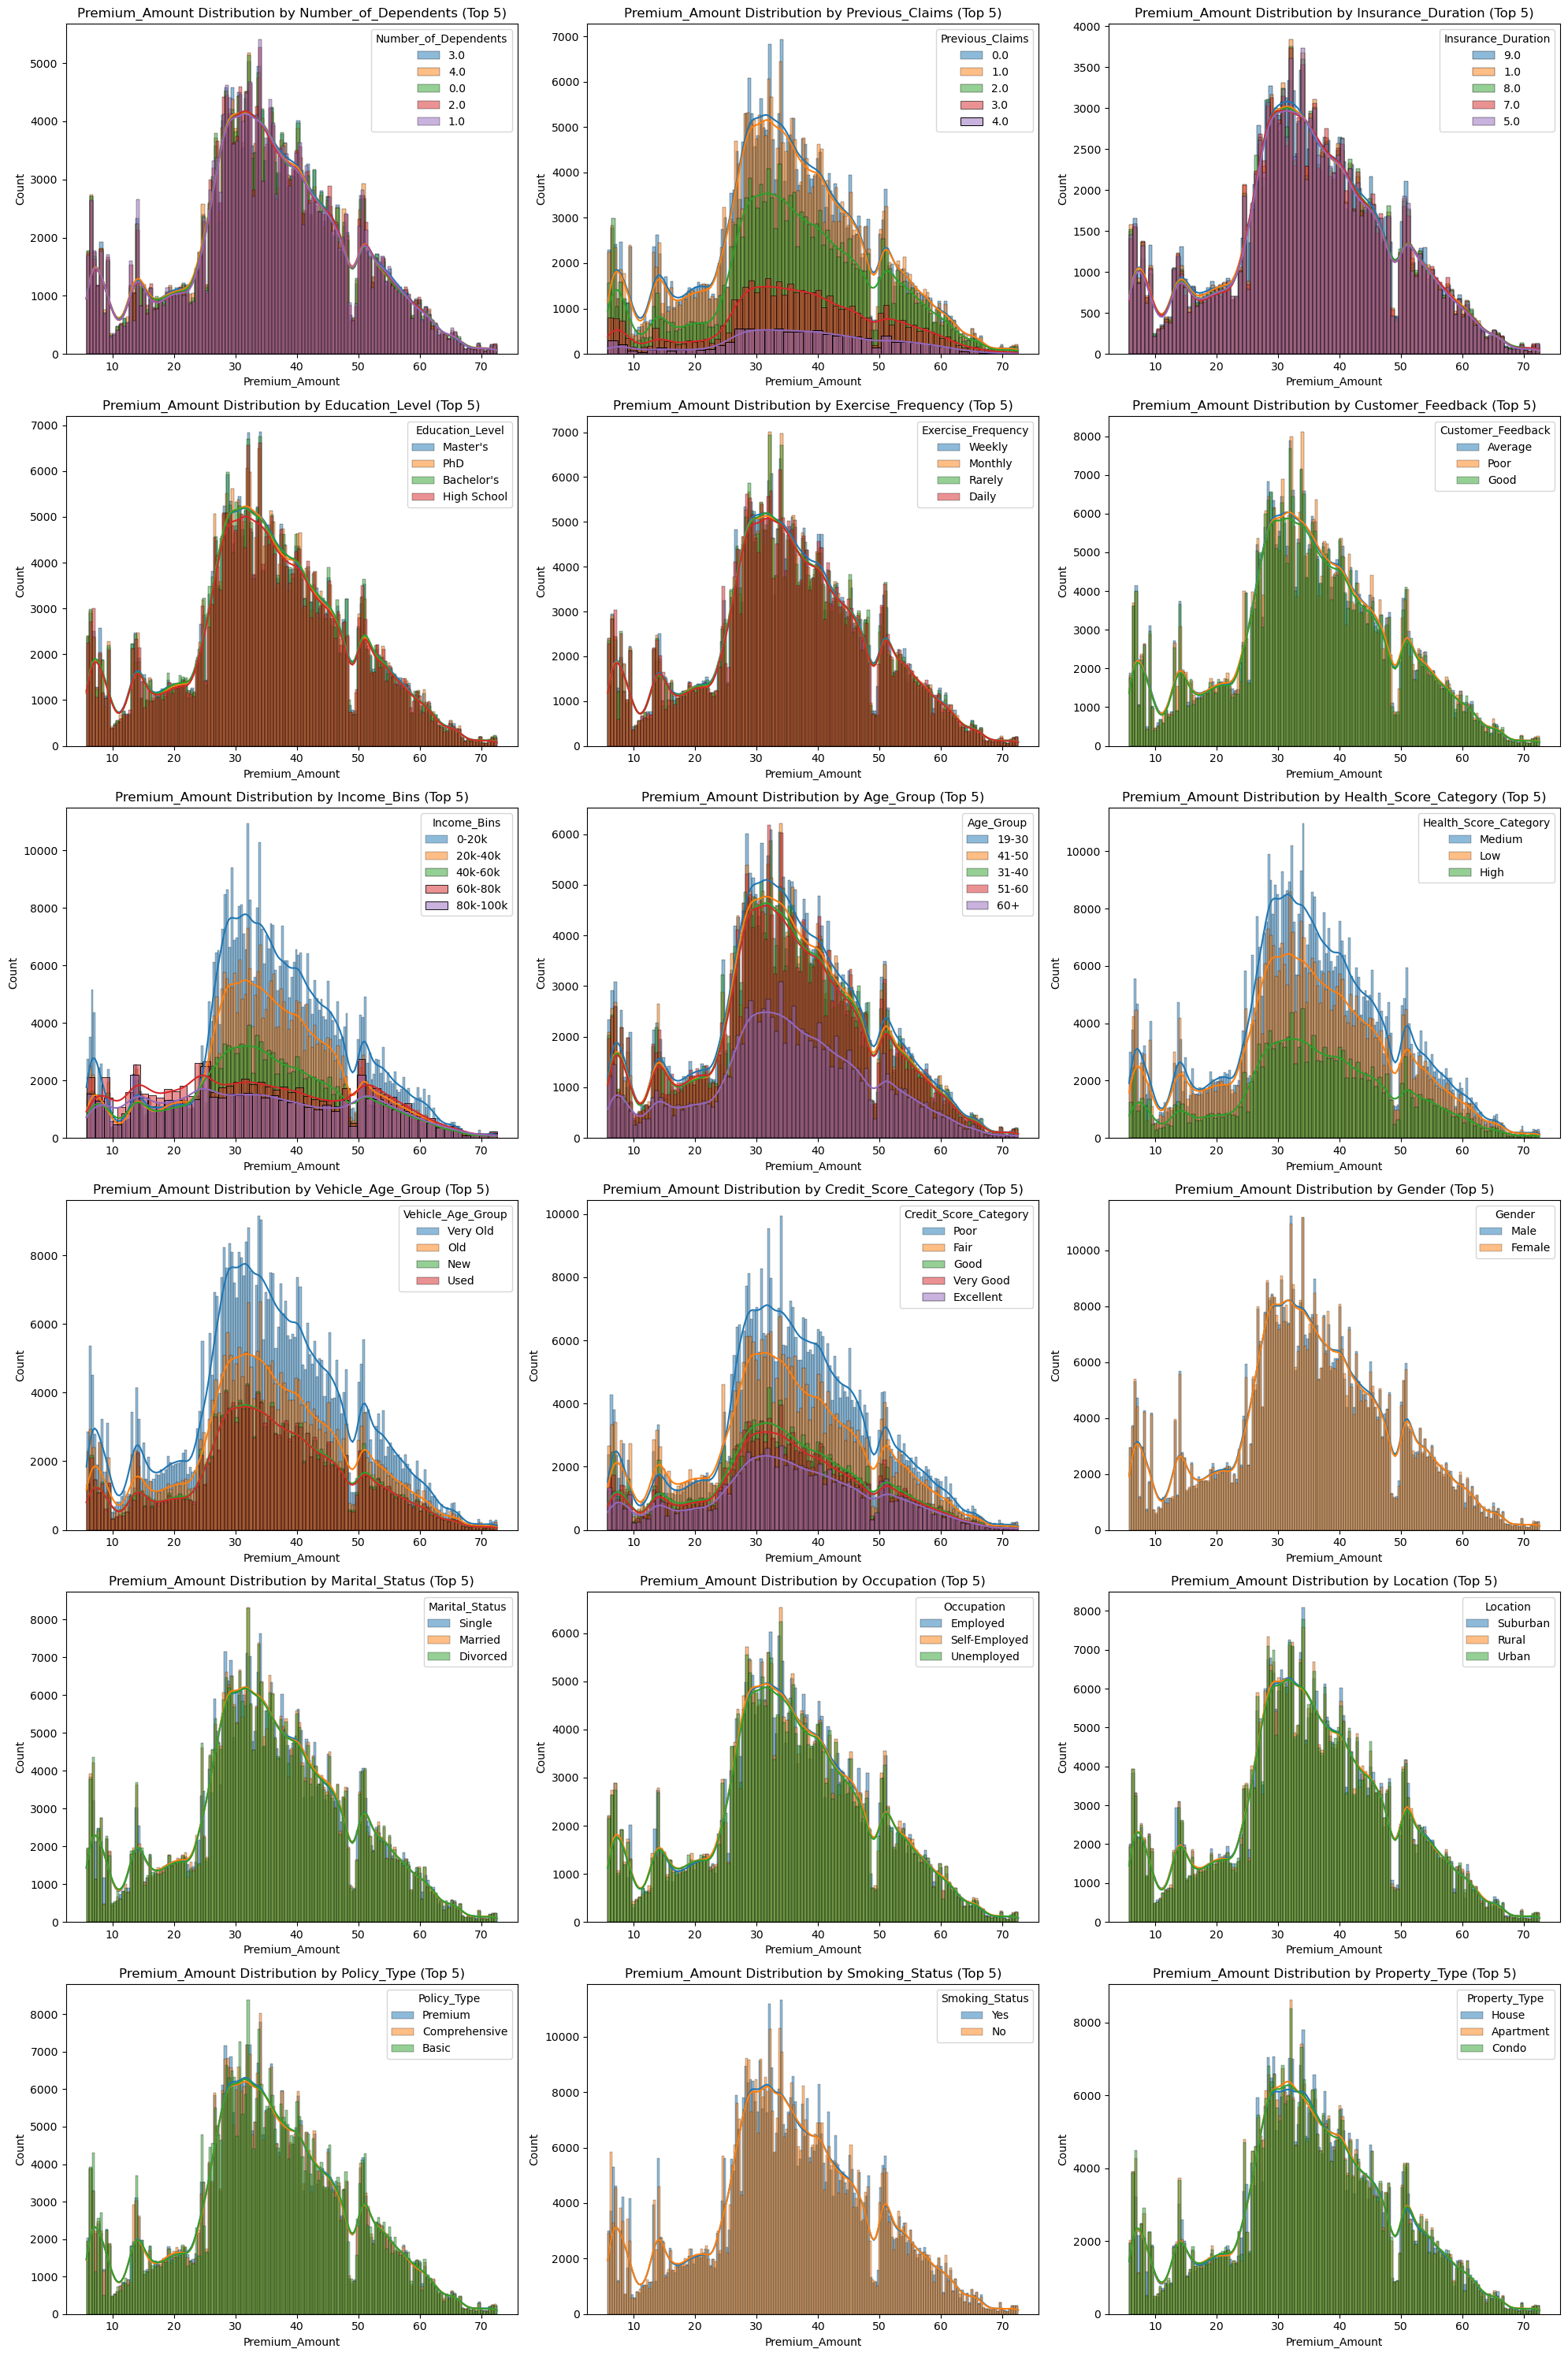

In [148]:
# Specify the continuous target column
target_column = 'Premium_Amount'

# Specify the maximum number of categories to display
max_categories = 5

# Filter the categorical columns
cat_cols = discrete_count+ordinal+nominal

# Create a figure with subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3  # 3 plots per row
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5 * num_rows))

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Create a histplot for each categorical column
for i, col in enumerate(cat_cols):
    if i < len(axs):  # Ensure we don't exceed the number of subplots
        # Get the top max_categories by frequency
        top_categories = data[col].value_counts().index[:max_categories]
        for unique_value in top_categories:
            sns.histplot(data[data[col] == unique_value][target_column], 
                         kde=True, 
                         ax=axs[i], 
                         label=str(unique_value),
                         alpha=0.5)  # Add transparency for overlapping
        axs[i].set_title(f'{target_column} Distribution by {col} (Top {max_categories})')
        axs[i].legend(title=col)  # Add a legend for categories

# Remove any remaining blank subplots
for i in range(len(cat_cols), len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

**Numerical column distribution (both histogram and boxplot)**

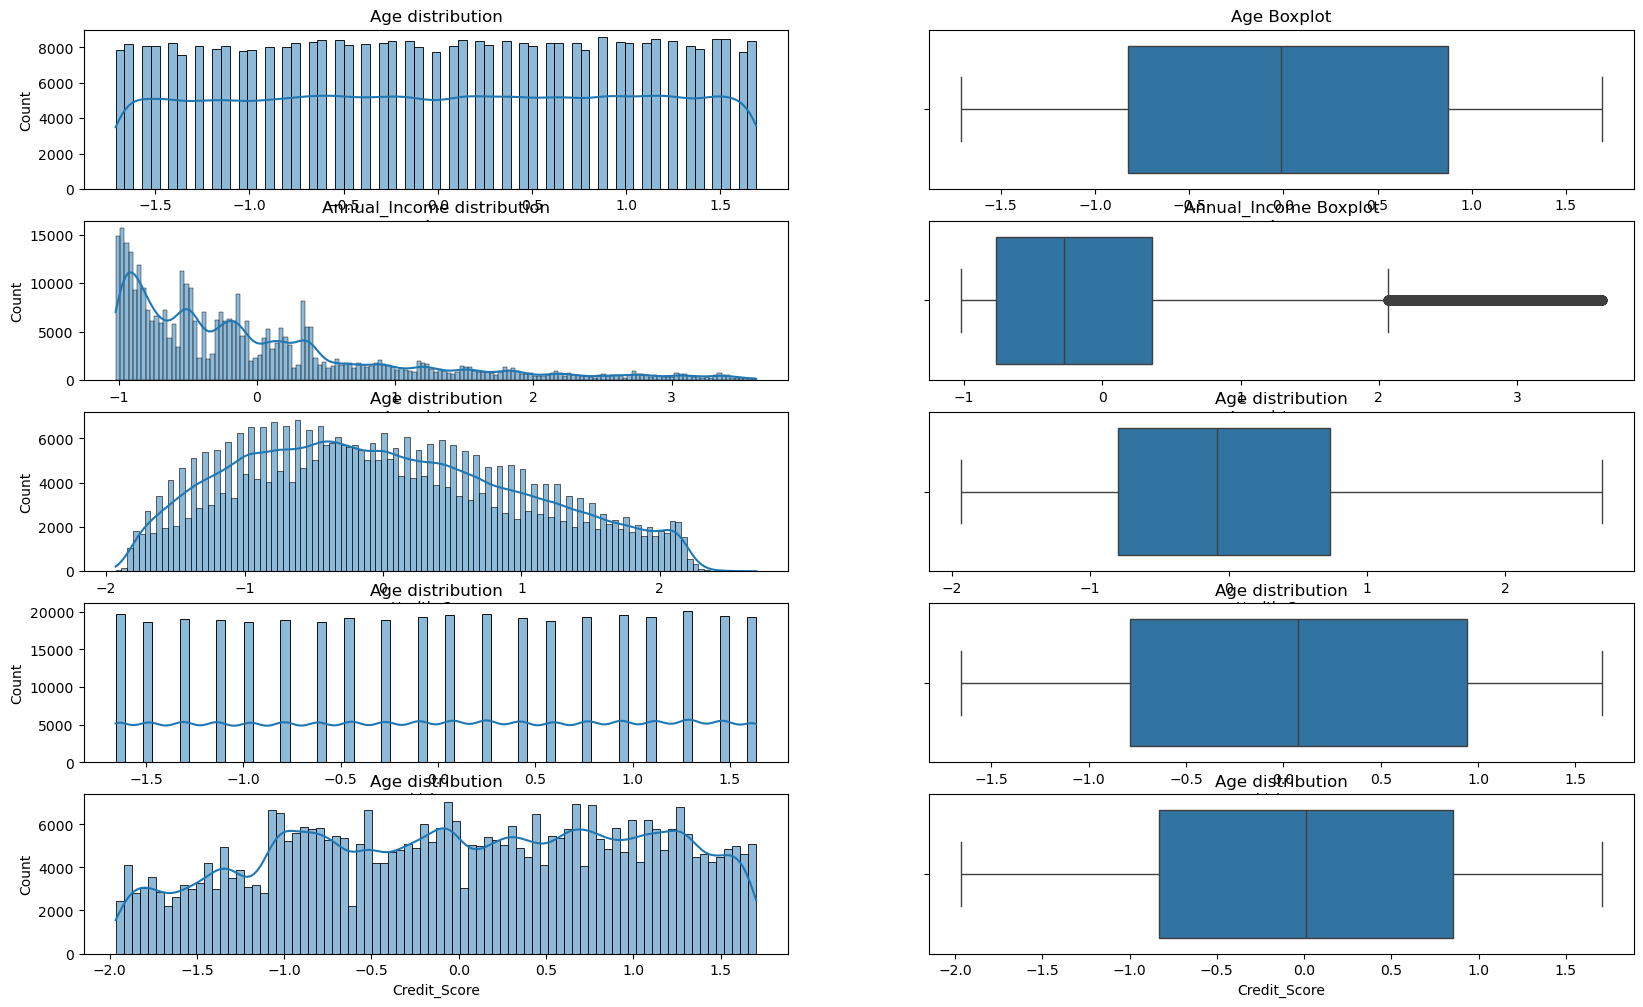

In [32]:
plt.figure(figsize=(20,12))
plt.subplot(5,2,1)
plt.title('Age distribution')
sns.histplot(data['Age'],kde=True)
plt.subplot(5,2,2)
plt.title('Age Boxplot')
sns.boxplot(x=data['Age'])
plt.subplot(5,2,3)
plt.title('Annual_Income distribution')
sns.histplot(data['Annual_Income'],kde=True)
plt.subplot(5,2,4)
plt.title('Annual_Income Boxplot')
sns.boxplot(x=data['Annual_Income'])
plt.subplot(5,2,5)
plt.title('Age distribution')
sns.histplot(data['Health_Score'],kde=True)
plt.subplot(5,2,6)
plt.title('Age distribution')
sns.boxplot(x=data['Health_Score'])
plt.subplot(5,2,7)
plt.title('Age distribution')
sns.histplot(data['Vehicle_Age'],kde=True)
plt.subplot(5,2,8)
plt.title('Age distribution')
sns.boxplot(x=data['Vehicle_Age'])
plt.subplot(5,2,9)
plt.title('Age distribution')
sns.histplot(data['Credit_Score'],kde=True)
plt.subplot(5,2,10)
plt.title('Age distribution')
sns.boxplot(x=data['Credit_Score'])
plt.show()

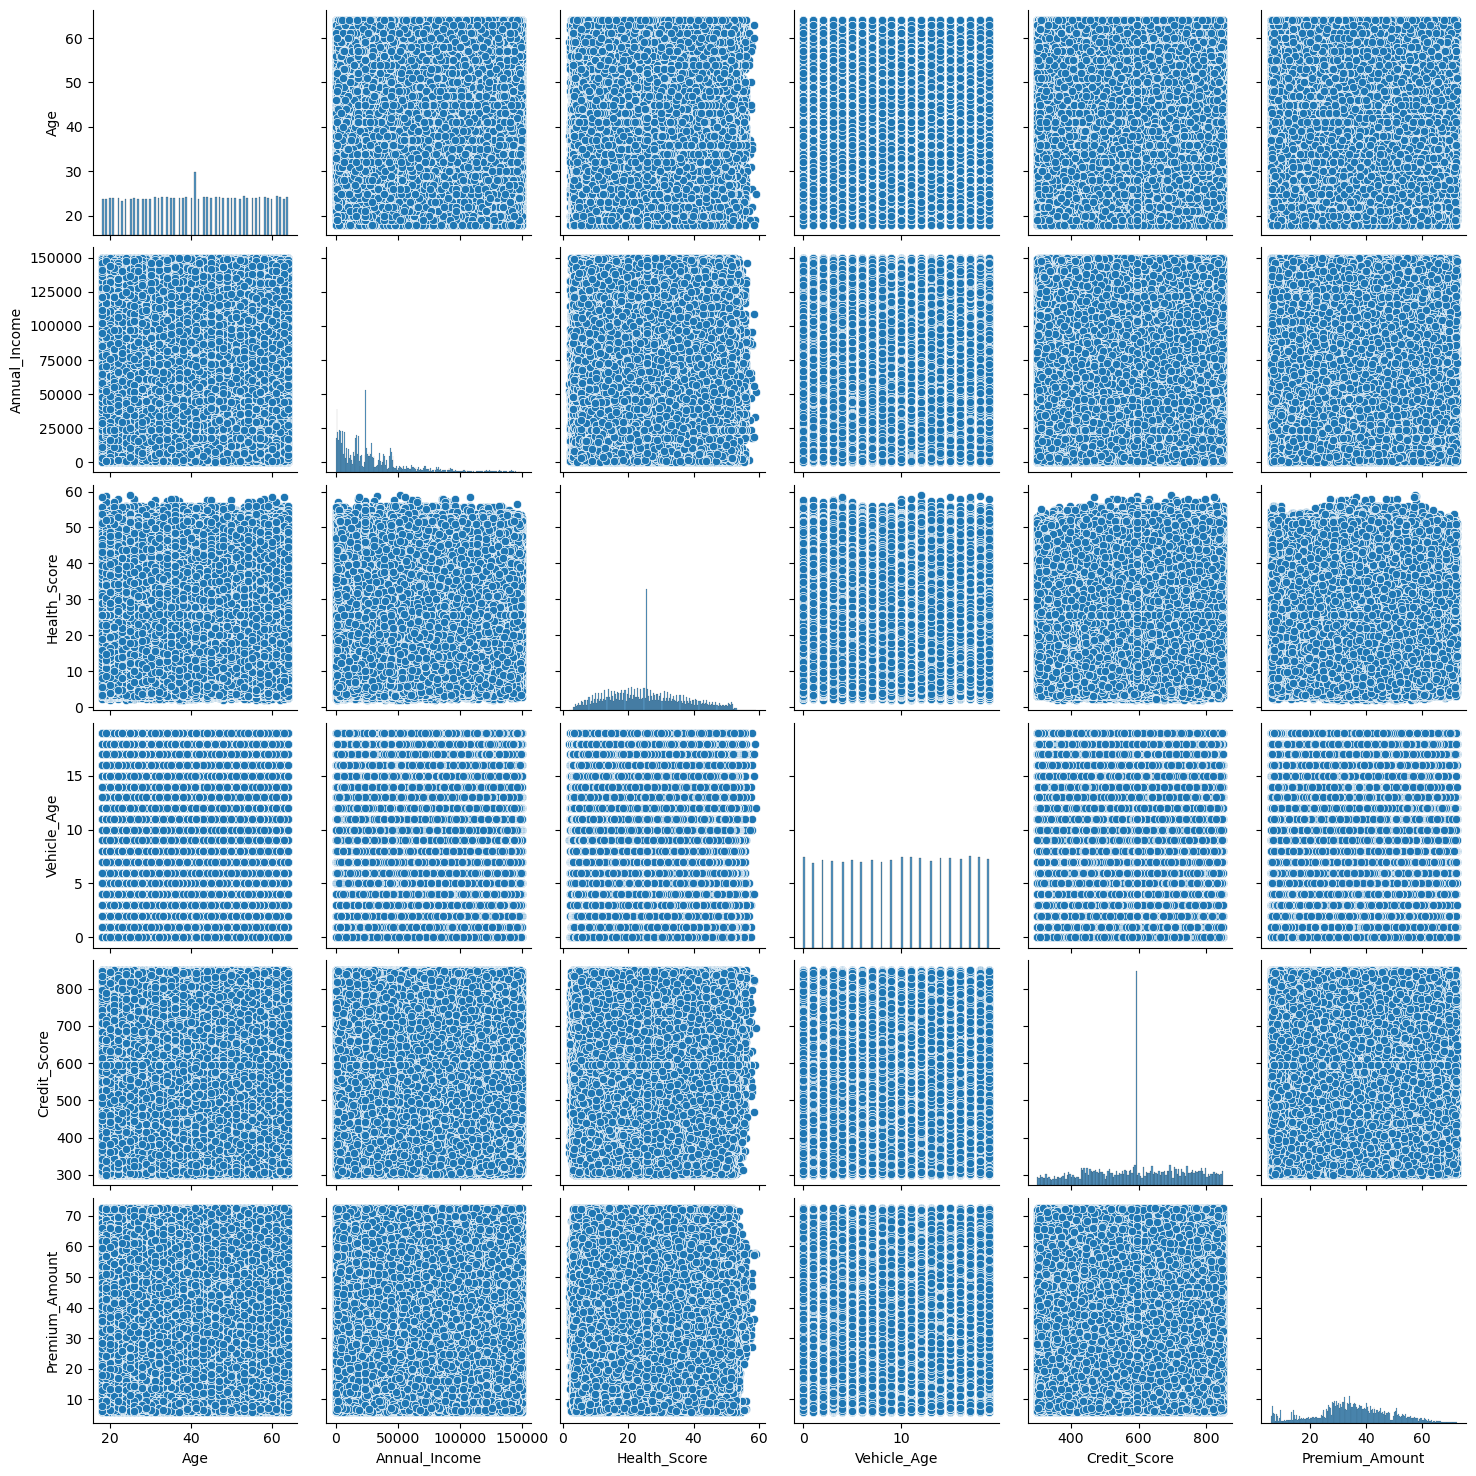

In [149]:
sns.pairplot(data[continous])
plt.show()

In [150]:
data[continous].skew()

Age              -0.012631
Annual_Income     1.522954
Health_Score      0.291322
Vehicle_Age      -0.020417
Credit_Score     -0.125786
Premium_Amount   -0.058405
dtype: float64

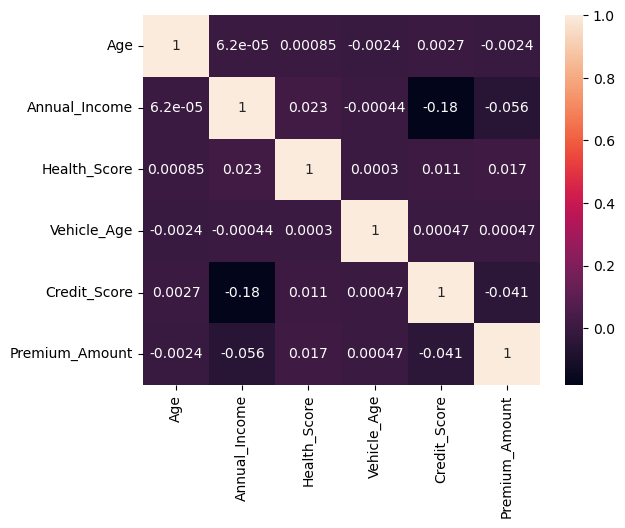

In [151]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

### *Step-3: Data Preprocessing*

**Feature Engineering**

In [194]:
drop_cols = ['Policy_Start_Date']
data.drop(columns=drop_cols,inplace=True)

**1. Data Cleaning**

**1.1 Wrong data**

In [21]:
# No wrong data

**1.2 Wrong data type**

In [ ]:
# No wrong data type

**1.3 Duplicates**

In [195]:
data.duplicated().sum()

1

**1.4 Missing values**

In [197]:
data.isnull().sum()

Age                      0
Gender                   0
Annual_Income            0
Marital_Status           0
Number_of_Dependents     0
Education_Level          0
Occupation               0
Health_Score             0
Location                 0
Policy_Type              0
Previous_Claims          0
Vehicle_Age              0
Credit_Score             0
Insurance_Duration       0
Customer_Feedback        0
Smoking_Status           0
Exercise_Frequency       0
Property_Type            0
Premium_Amount           0
Age_Group                0
Income_Bins              0
Health_Score_Category    0
Vehicle_Age_Group        0
Credit_Score_Category    0
dtype: int64

In [196]:
data['Marital_Status'].fillna(data['Marital_Status'].mode()[0],inplace=True)
data['Number_of_Dependents'].fillna(data['Number_of_Dependents'].mode()[0],inplace=True)
data['Occupation'].fillna(data['Occupation'].mode()[0],inplace=True)
data['Previous_Claims'].fillna(data['Previous_Claims'].mode()[0],inplace=True)
data['Insurance_Duration'].fillna(data['Insurance_Duration'].mode()[0],inplace=True)
data['Customer_Feedback'].fillna('Unknown',inplace=True)

In [ ]:
continous = ['Age','Annual_Income','Health_Score','Vehicle_Age','Credit_Score']

**1.5 Outlier Analysis**

In [198]:
q1 = data["Annual_Income"].quantile(0.25)
q3 = data["Annual_Income"].quantile(0.75)
iqr = q3 - q1

# Calculate Lower and Upper Limits
ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr

In [199]:
data["Annual_Income"] = data["Annual_Income"].clip(lower=ll, upper=ul)

In [202]:
data['Annual_Income'].skew()

1.065353502517491

**2. Data Wrangling**

**2.1 Feature Transformation**

In [441]:
# No need of Feature transformation now, later check it

**2.2 Feature Scaling**

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Age'] = sc.fit_transform(data[['Age']])
data['Annual_Income'] = sc.fit_transform(data[['Annual_Income']])
data['Vehicle_Age'] = sc.fit_transform(data[['Vehicle_Age']])
data['Credit_Score'] = sc.fit_transform(data[['Credit_Score']])
data['Health_Score'] = sc.fit_transform(data[['Health_Score']])

**2.4 Feature Encoding**

**1. Nominal encoding**

In [443]:
# Later check it

**2. Oridinal Encoding**

In [203]:
data['Education_Level']=data['Education_Level'].map({'High School':0,"Bachelor's":1,"Master's":2,'PhD':3})
data['Policy_Type'] = data['Policy_Type'].map({'Basic':0,'Comprehensive':1,'Premium':2})
data['Customer_Feedback'] = data['Customer_Feedback'].map({'Unknown':0,'Poor':1,'Average':2,'Good':3})
data['Exercise_Frequency'] = data['Exercise_Frequency'].map({'Rarely':0,'Daily':1,'Weekly':2,'Monthly':3})
data['Health_Score_Category'] = data['Health_Score_Category'].map({'Low':0,'Medium':1,'High':2})
data['Vehicle_Age_Group'] = data['Vehicle_Age_Group'].map({'Very Old':0,'Old':1, 'Used':2, 'New':3})
data['Credit_Score_Category'] = data['Credit_Score_Category'].map({'Poor':0,'Fair':3, 'Excellent':4, 'Good':1, 'Very Good':2})
data['Income_Bins'] = data['Income_Bins'].map({'0-20k':0, '20k-40k':1, '120k-150k':6, '40k-60k':2, '60k-80k':3, '80k-100k':4,
       '100k-120k':5})
data['Age_Group'] = data['Age_Group'].map({'19-30':1, '41-50':3, '51-60':4, '18 and below':0, '31-40':2, '60+':5})

In [204]:
data['Vehicle_Age_Group'].unique()

array([0, 3, 1, 2], dtype=int64)

**3. One Hot Encoding**

In [205]:
data = pd.get_dummies(data,drop_first=True)

In [206]:
data.head()

Age  Annual_Income  Number_of_Dependents  Education_Level  \
0 -1.648471      -0.756646                   1.0                1   
1 -0.159711       0.025028                   3.0                2   
2 -1.350719      -0.194559                   3.0                0   
3 -1.499595       2.381109                   2.0                1   
4 -1.499595       0.313173                   1.0                1   

   Health_Score  Policy_Type  Previous_Claims  Vehicle_Age  Credit_Score  \
0     -0.255071            2              2.0     1.286327     -1.567375   
1     -0.849704            1              1.0     0.420705      0.714630   
2      1.824212            2              1.0     0.766954      0.013020   
3     -1.241521            0              1.0    -1.656787     -1.602810   
4     -0.443102            2              0.0    -0.271792      0.034281   

   Insurance_Duration  Customer_Feedback  Exercise_Frequency  Premium_Amount  \
0                 5.0                  1                   2       57.641869   
1                 2.0                  2                   3       43.711574   
2                 3.0                  3                   2       28.979441   
3                 1.0                  1                   1       32.978557   
4                 4.0                  1                   2       49.800837   

   Age_Group  Income_Bins  Health_Score_Category  Vehicle_Age_Group  \
0          1            0                      1                  0   
1          2            1                      0                  0   
2          1            1                      2                  0   
3          1            6                      0                  3   
4          1            1                      1                  1   

   Credit_Score_Category  Gender_Male  Marital_Status_Married  \
0                      0        False                    True   
1                      1        False                   False   
2                      3         True                   False   
3                      0         True                    True   
4                      3         True                   False   

   Marital_Status_Single  Occupation_Self-Employed  Occupation_Unemployed  \
0                  False                      True                  False   
1                  False                     False                  False   
2                  False                      True                  False   
3                  False                     False                  False   
4                   True                      True                  False   

   Location_Suburban  Location_Urban  Smoking_Status_Yes  Property_Type_Condo  \
0              False            True               False                False   
1              False           False                True                False   
2               True           False                True                False   
3              False           False                True                False   
4              False           False                True                False   

   Property_Type_House  
0                 True  
1                 True  
2                 True  
3                False  
4                 True

In [207]:
data.shape

(1200000, 28)

In [208]:
data.to_csv('cleaned_data2.csv',index=False)